# Exercise: 1

In [121]:
# Importing the liabraries
import numpy as np
import pandas as pd
import os
import datetime 
import seaborn as sn
import matplotlib.pyplot as plt
## Write all the outputs in one window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

## Checking the work directory
os.getcwd()
## Current working directory is not at the place

'C:\\Users\\U367393\\Documents\\Getting Started With Python'

In [122]:
#define path
path_ds =r"C:\Users\U367393\Documents\01 Personal Documents\Python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data"
file_name="bollywood.csv"
overall_path=path_ds +"\\"+file_name
bollywood = pd.read_csv(overall_path)
bollywood.head(10)
bollywood.shape
bollywood.info()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1


(149, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
SlNo                   149 non-null int64
Release Date           149 non-null object
MovieName              149 non-null object
ReleaseTime            149 non-null object
Genre                  149 non-null object
Budget                 149 non-null int64
BoxOfficeCollection    149 non-null float64
YoutubeViews           149 non-null int64
YoutubeLikes           149 non-null int64
YoutubeDislikes        149 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 11.7+ KB


## #Q1: how many movies for each genre and which genre had the highest and arrange by descending

In [123]:
## Value count throws series and it needs to be converted to dataframe
bollywood["Genre"].value_counts() ## I observe that thriller and action are coming twice
## Lets try to trim the column 
bollywood["Genre"] =bollywood["Genre"].str.strip()
##Taking value counts again
genre_ds=pd.DataFrame(bollywood["Genre"].value_counts())### Now its perfect
genre_ds.columns =["movie_count"]
genre_ds.head(100)
genre_ds.shape
##Genre with highest movies
genre_ds.sort_values("movie_count",ascending=False)[0:1]

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: Genre, dtype: int64

,movie_count
Comedy,36
Drama,35
Thriller,29
Romance,25
Action,24


(5, 1)

,movie_count
Comedy,36


## Q2: Summary og GenreX Release Time

In [124]:
## Cross tab 
type(bollywood.Genre)
## Cross tab is a function : which is supplied two series 
cross_tab=pd.crosstab(bollywood.Genre,bollywood.ReleaseTime)
cross_tab.head(100)
cross_tab.shape
cross_tab["Genre"]=list(cross_tab.index) # Access Row Names
cross_tab.head(100)
cross_tab.shape
cross_tab.columns = list(cross_tab.columns) 
cross_tab.head(100)
cross_tab.shape

pandas.core.series.Series

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


(5, 4)

ReleaseTime,FS,HS,LW,N,Genre
Genre,,,,,
Action,3,3,3,15,Action
Comedy,3,5,5,23,Comedy
Drama,4,6,1,24,Drama
Romance,3,3,4,15,Romance
Thriller,4,1,2,22,Thriller


(5, 5)

,FS,HS,LW,N,Genre
Genre,,,,,
Action,3,3,3,15,Action
Comedy,3,5,5,23,Comedy
Drama,4,6,1,24,Drama
Romance,3,3,4,15,Romance
Thriller,4,1,2,22,Thriller


(5, 5)

## Month with Maximum Movies

In [125]:
## Looking at dataset
bollywood.head(5)
## Breaking the String and keeping first element of the broken string
bollywood["release_month"]= list(map(lambda x: x.split("-")[1],list(bollywood["Release Date"])))
##Although value_counts by default returns highest row at top, we have created a consolidated logic 
list(pd.DataFrame(bollywood.release_month.value_counts()).sort_values("release_month",ascending=False)[0:1].index)


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


['Jan']

## Month with max high budget movies (25 CR+)

In [126]:
## Filter for high budget movies:
high_budget = 25
bollywood_hb = bollywood[bollywood.Budget >= high_budget]

##Although value_counts by default returns highest row at top, we have created a consolidated logic 
list(pd.DataFrame(bollywood_hb.release_month.value_counts()).sort_values("release_month",ascending=False)[0:1].index)

pd.DataFrame(bollywood_hb.release_month.value_counts())


['Feb']

,release_month
Feb,9
Jan,8
Aug,7
Mar,7
Jul,6
Nov,6
Jun,5
Sep,5
Apr,4
Oct,4


## Top 10 movies by ROI

In [127]:
## Creating new column ROI
bollywood["roi"] = (bollywood["BoxOfficeCollection"]-bollywood["Budget"])/bollywood["Budget"]
bollywood_roi = bollywood[["BoxOfficeCollection","Budget","roi"]]
bollywood_roi.head(5)
bollywood.sort_values("roi",ascending=False)[["MovieName","roi"]][0:10]

,BoxOfficeCollection,Budget,roi
0,104.00,36,1.888889
1,12.00,10,0.200000
2,4.00,10,-0.600000
3,0.35,7,-0.950000
4,10.80,18,-0.400000


,MovieName,roi
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


## Movies have ROI at Long Weekend or Festive Season

,ReleaseTime,roi
2,LW,1.127205
0,FS,0.973853
1,HS,0.850867
3,N,0.657722


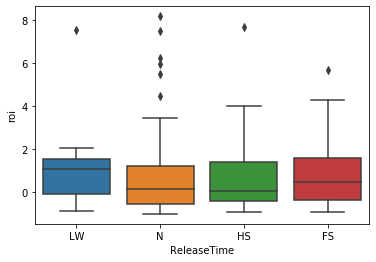

In [128]:
##Calculating average ROI for different release times
bollywood.groupby("ReleaseTime")["roi"].mean().reset_index().sort_values("roi",ascending=False)
sn.boxplot(x="ReleaseTime",y="roi",data=bollywood)

##  Draw histogram and distribution plot to check for distribution of movie budgets

(array([138.,  11.]), array([  2.,  76., 150.]), <a list of 2 Patch objects>)

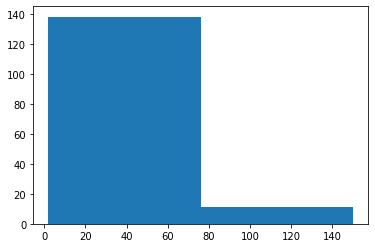

In [129]:
plt.hist("Budget",data=bollywood,bins=2)

[2, 2, 2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 18, 18, 18, 18, 19, 20, 20, 20, 20, 21, 21, 22, 22, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 27, 27, 27, 28, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 32, 33, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 40, 40, 40, 40, 40, 42, 45, 48, 50, 50, 50, 50, 50, 50, 50, 60, 60, 60, 70, 75, 75, 75, 85, 85, 90, 90, 100, 100, 115, 120, 125, 140, 150] 149


2

150

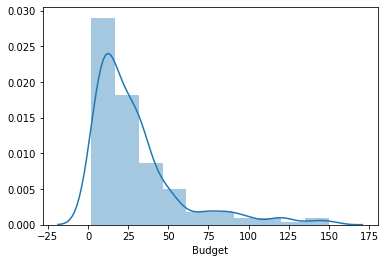

In [130]:
## Plotting distribution chart
sn.distplot(bollywood["Budget"],bins=10)
## Looking at the list
x=list(bollywood["Budget"])
x.sort()
##Checking min and max value of list 
print(x,len(x))
min(x)
max(x)

## Compare distribution of ROIs for Comedy and Drama Genre

0      Romance
1     Thriller
2       Comedy
3        Drama
10      Action
Name: Genre, dtype: object

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,release_month,roi
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.60
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.95
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.40
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84,May,4.00
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,Sep,-0.18


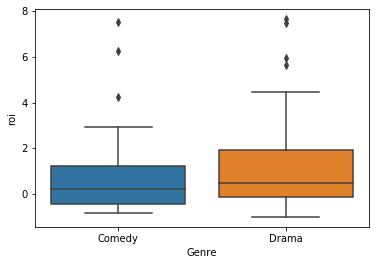

In [131]:
## We will use distribution plots for it 
bollywood["Genre"].drop_duplicates()
bollywood_comp = bollywood[(bollywood["Genre"] =="Comedy") | (bollywood["Genre"] =="Drama") ]
bollywood_comp.head(5)
sn.boxplot(y="roi",x="Genre",data=bollywood_comp)
## The box plot shows that the Drama movies typically sees higher ROIs


"This indicates that majority of the movies have ROI close to 0.\n'Although, Drama seems to perform well with good distribution across positive side of the ROI as well "

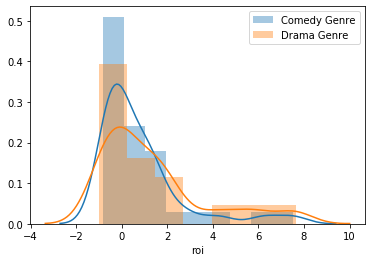

In [132]:
## Also checking the distribution plot
bollywood_comp_com = bollywood_comp[bollywood_comp.Genre =="Comedy"]
bollywood_comp_dra = bollywood_comp[bollywood_comp.Genre =="Drama"]

sn.distplot(bollywood_comp_com["roi"],label="Comedy Genre")
sn.distplot(bollywood_comp_dra["roi"],label="Drama Genre")
plt.legend()

'''This indicates that majority of the movies have ROI close to 0.
'Although, Drama seems to perform well with good distribution across positive side of the ROI as well '''

## Correlation between box office collection and youtube likes

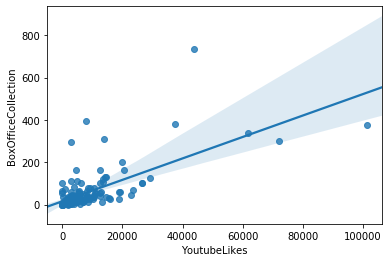

In [133]:
keep_cols = ["BoxOfficeCollection","YoutubeLikes"]
## Lets try to plot scatter plot first
sn.regplot(y="BoxOfficeCollection",x="YoutubeLikes",data=bollywood)
## Initial regression plot indicates that there is a positive correlation.

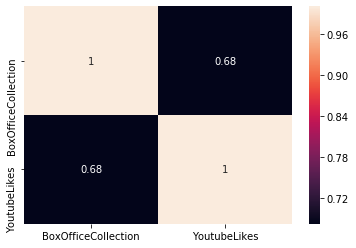

In [134]:
## Let's check it in deep
sn.heatmap(bollywood[keep_cols].corr(),annot=True)
## There is indeed a correlation of around 70% for the two variables

## Which Genre sees more youtube dislikes

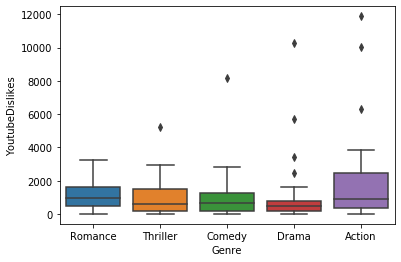

In [135]:
## Lets plot box plots for it
sn.boxplot(x="Genre",y="YoutubeDislikes",data=bollywood)
## Action sees the majority of the dislikes

## Which variables are highly correlated?

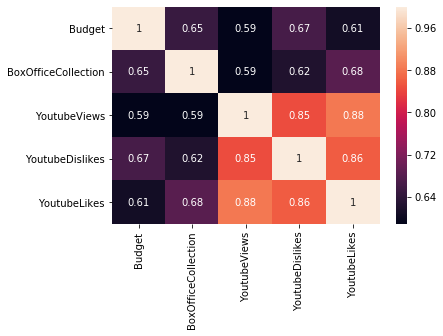

In [136]:
keep_variables=["Budget","BoxOfficeCollection","YoutubeViews","YoutubeDislikes","YoutubeLikes"]
sn.heatmap(bollywood[keep_variables].corr(),annot=True)

# <u>Exercise:2</u> 

In [137]:
## Import SAheart dataset
#define path
path_ds =r"C:\Users\U367393\Documents\01 Personal Documents\Python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data"
file_name="SAheart.txt"
overall_path=path_ds +"\\"+file_name
heart = pd.read_csv(overall_path)
heart.info()
heart.shape
heart.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


(462, 11)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Check the relation between chd and family history

In [138]:
## Plotting a crosstab
pd.crosstab(heart["chd"],heart["famhist"],normalize="index") ## Wow this gives the row %

pd.crosstab(heart["chd"],heart["famhist"]).apply(lambda r: r/r.sum(),axis=1) ## Wow this gives the row % or column % based on axis value

famhist,Absent,Present
chd,,
0,0.682119,0.317881
1,0.400000,0.600000


famhist,Absent,Present
chd,,
0,0.682119,0.317881
1,0.400000,0.600000


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,flag
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


,chd,famhist,flag
0,0,Absent,206
1,0,Present,96
2,1,Absent,64
3,1,Present,96


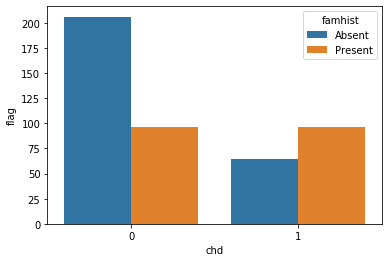

In [139]:
## Bar Plot
heart_bar = heart
heart_bar["flag"] =1
heart_bar.head(5)

## .reset_index() converts it to dataframe directly
heart_bar_group =heart_bar.groupby(["chd","famhist"])["flag"].sum().reset_index()
heart_bar_group.head(5)

sn.barplot(y="flag",x="chd",data=heart_bar_group,hue="famhist")

## Is there any correlation between age and sbp 

,age,sbp
age,1.000000,0.388771
sbp,0.388771,1.000000


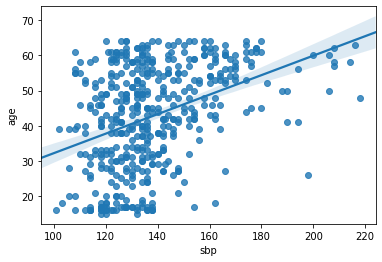

In [140]:
## Correlation between age and sbp
## Lets look at regression plot first

sn.regplot(heart["sbp"],heart["age"])

heart[["age","sbp"]].corr()

## Tobacco consumption distribution for person with and without chd 

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,flag
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


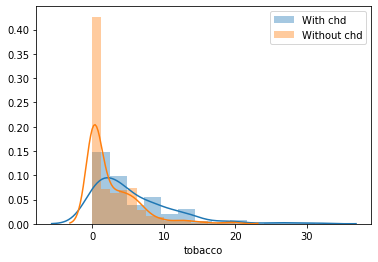

In [141]:
heart.head(5)
## Lets look at distribution plot
sn.distplot(heart[heart["chd"]==1]["tobacco"],label="With chd")
sn.distplot(heart[heart["chd"]==0]["tobacco"],label="Without chd")
plt.legend()

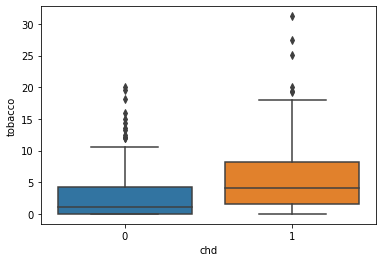

In [142]:
## Lets check box plots also
sn.boxplot(y="tobacco",x="chd",data=heart)

## How are parameters correlated

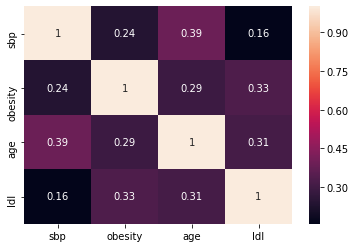

In [143]:
par = ["sbp","obesity","age","ldl"]

sn.heatmap(heart[par].corr(),annot=True)

## Create a new column with age categories

In [144]:
heart.head(5)

# lets define a function first

def age_cat(x):
    if x in range(1,16):
        return "young"
    elif x in range(16,36):
        return "adults"
    elif x in range(36,56):
        return "mid"
    else:
        return "old"

heart["age_category"]=list(map(age_cat,list(heart["age"])))

heart.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,flag
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,flag,age_category
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,1,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1,mid


## CHD Cases in the age categories

,age_category,chd
0,adults,18
1,mid,81
2,old,61
3,young,0


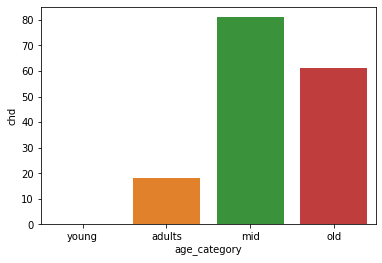

In [145]:
## Group by

age_group = heart.groupby("age_category")["chd"].sum().reset_index()
age_group.head(1000000)
age_group["order"] =[2,3,4,1]
age_group=age_group.sort_values("order")
sn.barplot(y="chd",x="age_category",data=age_group)

##  ldl distribution for each age categories

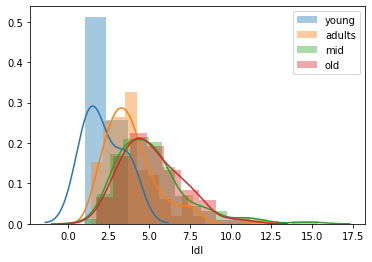

In [146]:
## Box plot
for i in list(age_group["age_category"]):
    sn.distplot(heart[heart["age_category"]==i]["ldl"],label=i)

plt.legend()

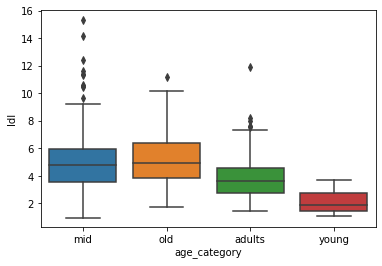

In [147]:
## Box plot
sn.boxplot(y="ldl",x="age_category",data=heart)